<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/ML_Estat%C3%ADstica_Distr_Frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui veremos algumas estatisticas para usarmos na construção dos modelos de ML

**Distribuição de Frequências**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dados = np.array([160, 165, 164, 167, 164, 160, 166, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

Vamos ordenar as alturas agora:

In [8]:
dados = np.sort(dados)
dados #numeros na ordem agora

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 161, 161, 161, 161, 162, 163,
       163, 164, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [9]:
minimo = dados.min()
maximo = dados.max()

In [10]:
minimo, maximo

(150, 173)

In [13]:
np.unique(dados, return_counts=True) #vai mostrar a frequencia que cada numero aparece

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 4, 4, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1]))

vamos visualizar os dados

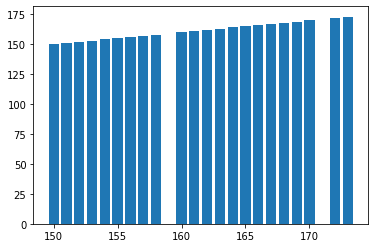

In [15]:
plt.bar(dados, dados);

**Numero de classes**

i = 1 + 3.3 log n

In [16]:
n = len(dados)
n

40

In [17]:
i = 1 + 3.3 * np.log10(n)

In [18]:
i

6.286797971382276

vamos arredondar este valor de i

In [21]:
i = round(i)
i #numero de classes

6

**Amplitude do intervalo**

h = AA/i


onde AA= xmax - xmin

In [23]:
AA = maximo - minimo
AA

23

In [24]:
h = AA / i
h

3.8333333333333335

arredondando, teremos:

In [26]:
h = round(h)
h

4

4 é a nossa amplitude de intervalo

aqui já deu certo, arredondou para cima, mas no geral, se quisermos arredondar sempre para cima, temos que usar:

In [27]:
import math

In [28]:
h = math.ceil(h)
h

4

**Construção da distrbuição de frequencias**

In [35]:
intervalos = np.arange(minimo, maximo + 2, step=h) # maximo +2 para ele chegar ate 173

In [36]:
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [38]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0
for i in range(n):
  if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
    intervalo1 += 1
  elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
    intervalo2 += 1
  elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
    intervalo3 += 1
  elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
    intervalo4 += 1
  elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
    intervalo5 += 1
  elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
    intervalo6 += 1

In [44]:
intervalos_lista = []
intervalos_lista.append(intervalo1)
intervalos_lista.append(intervalo2)
intervalos_lista.append(intervalo3)
intervalos_lista.append(intervalo4)
intervalos_lista.append(intervalo5)
intervalos_lista.append(intervalo6)
intervalos_lista # aqui temos as quantidades



[5, 9, 10, 8, 5, 3]

In [41]:
classes_lista =[]
for i in range(len(intervalos_lista)):
  classes_lista.append(str(intervalos[i]) + '_' + str(intervalos[i+1]))

In [43]:
classes_lista #intervalos de tanto a tanto

['150_154', '154_158', '158_162', '162_166', '166_170', '170_174']

visualizar novamente

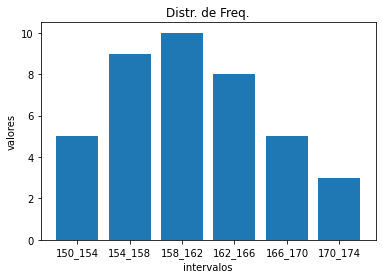

In [48]:
plt.bar(classes_lista, intervalos_lista)
plt.title('Distr. de Freq.')
plt.xlabel('intervalos')
plt.ylabel('valores')
plt.show();

bem melhor que o gráfico feito no começo!!

In [49]:
#mais histogramas e gráficos

In [50]:
frequencia, classes = np.histogram(dados)

In [52]:
frequencia, classes , len(classes)

(array([4, 2, 7, 3, 8, 3, 6, 3, 2, 2]),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

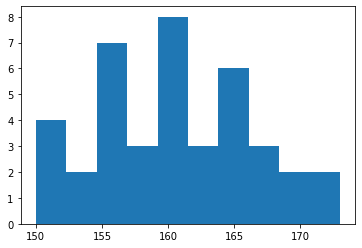

In [53]:
plt.hist(dados, bins=classes);

In [54]:
base = pd.DataFrame({'dados': dados})

In [55]:
base.head()

,dados
0,150
1,151
2,152
3,152
4,153


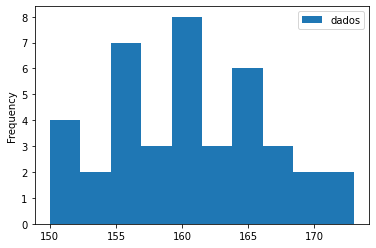

In [57]:
base.plot.hist();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


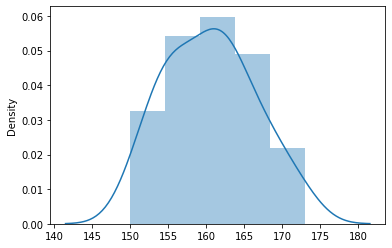

In [65]:
sns.distplot(dados, hist=True); #sem histograma(opção)hist=False, poderia acrescentar "kde=False, para tirar a linha"

a linha mostra o tipo da distribuição